# Line core saturation by high optical depth

Let's check how optical depth can affect the spectrum by saturating the line core. For this example, we need to consider a Gaussian line profile. Let's initialise the source:

In [1]:
from pythonradex import radiative_transfer,helpers
from scipy import constants
import numpy as np
import matplotlib.pyplot as plt

width_v = 1*constants.kilo
source = radiative_transfer.Source(
                          datafilepath='./co.dat',geometry='static slab',
                          line_profile_type='Gaussian',width_v=1*constants.kilo)
#we put a high column density to force high optical depth. We do not
#consider dust effects.
collider_densities = {'para-H2':1e3/constants.centi**3,'ortho-H2':3e3/constants.centi*3}
source.update_parameters(N=1e18/constants.centi**2,Tkin=50,
                        collider_densities=collider_densities,
                        ext_background=helpers.generate_CMB_background(),
                        T_dust=0,tau_dust=0)
source.solve_radiative_transfer()
index_21 = 1 #the 2-1 transition is listed 2nd in the LAMDA file,
#so its index is 1
print(f'tau_nu0 of CO 2-1: {source.tau_nu0_individual_transitions[index_21]}')

tau_nu0 of CO 2-1: 34.823247249994324


The line is very optically thick. Let's take a look at the spectrum of CO 2-1

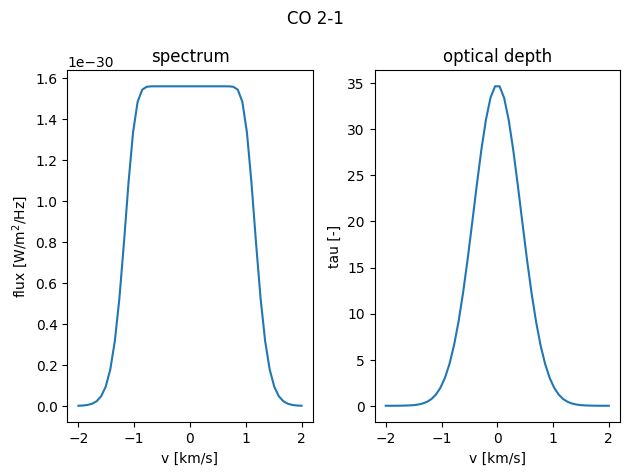

In [2]:
v = np.linspace(-2*width_v,2*width_v,50)
nu0_21 = source.emitting_molecule.nu0[index_21] #rest frequency of CO 2-1
nu = nu0_21*(1-v/constants.c)

#assume area of 1 au2 and distance of 100 pc
solid_angle = (1*constants.au)**2/(100*constants.parsec)**2
spectrum = source.spectrum(solid_angle=solid_angle,nu=nu)
tau_nu = source.tau_nu(nu=nu)

fig,axes = plt.subplots(ncols=2)
fig.suptitle('CO 2-1')
axes[0].plot(v/constants.kilo,spectrum)
axes[0].set_title('spectrum')
axes[0].set_ylabel(r'flux [W/m$^2$/Hz]')
axes[1].plot(v/constants.kilo,tau_nu)
axes[1].set_title('optical depth')
axes[1].set_ylabel(r'tau [-]')
for ax in axes:
    ax.set_xlabel('v [km/s]')
fig.tight_layout()

We can clearly see the saturated core of the spectrum.